# Tutorial: Introduction into Cat Qubit Physics

In this tutorial, you learn about cat qubit physics that we use at Alice & Bob.
You will learn:
- basic Circit QED
- the Hamiltonian of our system
- how to obtain an approximate Hamiltonian
- how to simulate the time-evolution of the system using `dynamiqs`

We will also demonstrate a few things about cat qubits using the simulation tool `dynamiqs`.

In [1]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'dynamiqs'

## Introduction: Why cat qubits?
To run reliable computations on a quantum computer at scale, it is essential to correct the errors of physical qubits. Without error correction, as the number of physical qubits grows, the accumulation of errors would dominate the computation, rendering the result meaningless.

Unlike classical bits, which are primarily susceptible to bit flips (0 ↔ 1), qubits face two distinct types of errors:
- **Bit flips**, which flip the quibt state $\lvert 0 \rangle \leftrightarrow \vert 1 \rangle$
- **Phase flips**, which alter the relative phase in superposition states (e.g., flipping $\lvert + \rangle \leftrightarrow \vert + \rangle$, where $\lvert \pm \rangle = (\lvert 0\rangle \pm \lvert 1\rangle)/\sqrt{2}$)

Below, you can see the effect of bit flips (left) and phase flips on states on the Bloch sphere:


<video width="49%" height="540" autoplay loop muted markdown="0">
    <source src="media/125fa238.mp4" type="video/mp4" markdown="0" >
</video>

<video width="49%" height="540" autoplay loop muted markdown="0">
    <source src="media/167fafd4.mp4" type="video/mp4" markdown="0" >
</video>

### The magic of cat qubits
Correcting both bit flips and phase flips is a tricky task. Conventional error correction schemes achieve this by using redundancy: multiple physical qubits are combined to form a single **logical qubit**. This logical qubit can detect and correct certain errors while preserving the encoded quantum information. However, this redundancy significantly increases the hardware overhead.

But what if we could design qubits that are already inherently immune to one type of error, leaving only the other type to be corrected? This would drastically reduce the hardware requirements for error correction.

Enter cat qubits! These qubits, inspired by Schrödinger's cat, use the states of a quantum harmonic oscillator rather than engineered two-level systems (e.g., transmons). 

![](media/Surface-code-vs-Repetition-Code-White.svg "Standard qubits vs cat qubits")

One crucial difference of the cat qubit with respect to conventional qubits is that they use the states of a quantum harmonic oscillator instead of engineered two-level systems (e.g. transmons). 

By encoding information in superpositions of coherent states (e.g., $\lvert \alpha \rangle$ and $\lvert -\alpha \rangle$), cat qubits access an infinite-dimensional Hilbert space to encode quantum information. This unique encoding allows them to suppress bit flips naturally, providing a significant advantage in building robust quantum computers.

### How Cat qubits work
Let's dive into what cat qubits are exactly and how they can be used in quantum information.

A crucial ingredient of the cat qubit is the so-called coherent state $\lvert \alpha \rangle$.

It is the state that is an eigenstate of the bosonic annihilation operator $\hat{a}$ with complex eigenvalue $\alpha$, that is
$$\hat{a} \lvert \alpha \rangle  = \alpha \lvert\alpha\rangle.$$
The coherent state is one of the most classical bosonic states. In phase space, it is just a Gaussian:

In [2]:
alpha = 2.0 + 1.0j
psi = dq.coherent(15, alpha)
dq.plot.wigner(psi)

NameError: name 'dq' is not defined

### How Cat qubits work
Let's dive into what cat qubits are exactly and how they can be used in quantum information.

A crucial ingredient of the cat qubit is the so-called coherent state $\lvert \alpha \rangle$.

It is the state that is an eigenstate of the bosonic annihilation operator $\hat{a}$ with complex eigenvalue $\alpha$, that is
$$\hat{a} \lvert \alpha \rangle  = \alpha \lvert\alpha\rangle.$$
The coherent state is one of the most classical bosonic states. In phase space, it is just a Gaussian:


One quantum state alone does not make a qubit, so we need one more.
But when taking a another coherent state with opposite sign $\lvert -\alpha \rangle$, we have all we got:
Let's define the logical $\lvert + \rangle_\alpha$ and $\lvert - \rangle_\alpha$ states by taking an even (+) and odd (-) superposition of the states $\lvert \alpha \rangle$ and $\lvert -\alpha \rangle$:

$$
\begin{align*}
\lvert + \rangle_\alpha \equiv \mathcal{N}_+ (\lvert \alpha\rangle + \lvert -\alpha \rangle)\\
\lvert - \rangle_\alpha \equiv \mathcal{N}_- (\lvert \alpha\rangle - \lvert -\alpha \rangle)\\
\end{align*}
$$
These states are also called even and odd cat states (in analogy to Schrodingers' thought experiment of taking a superposition of two macroscopically distinct states of a cat - dead and alive).

Here, $\mathcal{N}_\pm = 1/\sqrt{1 \pm e^{-2|\alpha|^2}}$ is a normalization constant.

It's imporant to note that these states are orhthogonal to each other, i.e. ${}_\alpha \langle + | - \rangle_\alpha = 0$, and hence qualify for a good qubit.

That's because $\lvert + \rangle_\alpha$ contains only even Fock states and $\lvert - \rangle_\alpha$ contins only odd Fock states (if you are unsure, convice yourself by a quick check).

The logical $\lvert 0\rangle_\alpha$ and $\lvert 1\rangle_\alpha$ are then simply given by
$$
\begin{align*}
\lvert 0 \rangle_\alpha =& \frac{1}{\sqrt{2}} \left( \lvert + \rangle_\alpha + \lvert - \rangle_\alpha\right) = \lvert \alpha \rangle + \mathcal{O}(e^{-2|\alpha|^2})\\
\lvert 1 \rangle_\alpha =& \frac{1}{\sqrt{2}} \left( \lvert - \rangle_\alpha + \lvert - \rangle_\alpha\right) = \lvert -\alpha \rangle + \mathcal{O}(e^{-2|\alpha|^2})
\end{align*}
$$

Let's visualize the states using `dynamiqs`:

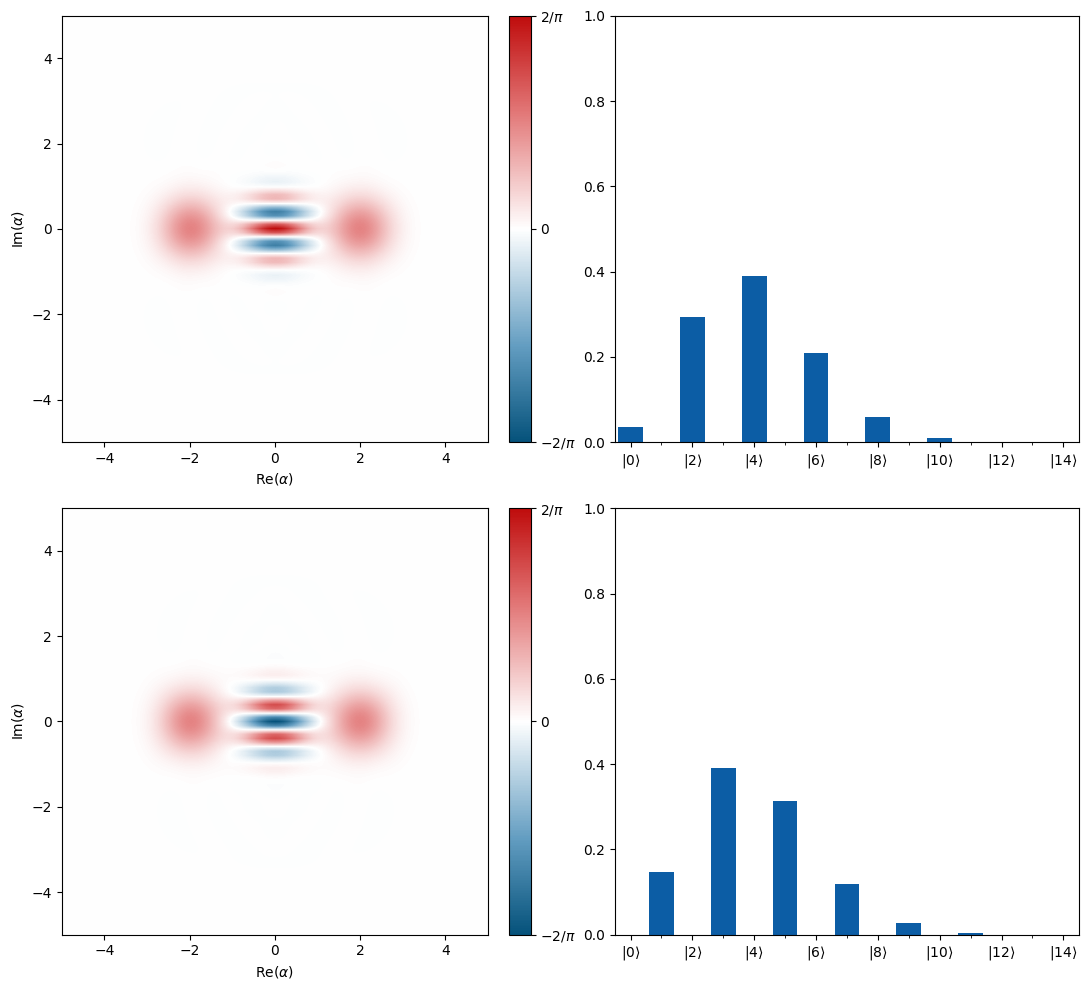

In [3]:
alpha = 2
na = 15 # Hilbert space dimension
cat_even = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
cat_odd = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
fig, ax = plt.subplots(2,2, figsize=(11,10))
dq.plot.wigner(cat_even, ax=ax[0,0]) # plot Wigner of even cat state 
dq.plot.fock(cat_even, ax=ax[0,1]) # plot Fock states of even cat state
dq.plot.wigner(cat_odd, ax=ax[1,0]) # plot Wigner of odd cat state
dq.plot.fock(cat_odd, ax=ax[1,1]) # plot Fock states of odd cat state
plt.tight_layout()

All these states contain an average number of photons $\approx |\alpha|^2$ for $|\alpha|>1$.

What about losses? A significant source of errors in a resonator is energy decay which collapses all states towards the
vacuum, thus erasing any encoded information.

We can however, balance this decay by a mechanism where the resonator exchanges only pairs of photons with its environment known as two photon dissipation.

This process is modeled by the loss operator:

$$\hat{L}_2 = \sqrt{\kappa_2}\left(\hat{a}^2 - \alpha^2\right)$$

The term $\hat{a}^2$ corresponds to a two-photon process (creation or annihilation of photon pairs).
The steady-state condition $\hat{L}_2 \lvert \psi \rangle = 0$ ensures that the system evolves into the manifold spanned by $\lvert \alpha \rangle$ and $\lvert -\alpha \rangle$.
This, so-called **dissipative stabilization** protects the cat states from drifting into other states.

In phase space, the potential landscape for the resonator is like a double-well, with minima at $\alpha$ and $-\alpha$.
As a result, local noise processes that slighly perturb the state will not yield to an error confusing $\lvert \alpha \rangle$ with $\lvert -\alpha \rangle$. And the larger we can make $\alpha$, the better we can protect against these bit-flips.

![](media/double_well_potential.png "Pseudo-potential of cat qubits")


### Engineering two-photon dissipation

The desired two-photon exchange between a resonator and its environment does not occur spontaneously. 
Instead, we can synthesize it by engineering an interaction that exchanges pairs of photons of the cat-qubit resonator with one photon of an intentionally lossy mode referred to as the buffer. The interaction Hamiltonian takes the form

$$\hat{H} = g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,$$

where $\hat{b}$ is the annihilation operator of the buffer and $g_2$ is the interaction strength.

We can further resonantly drive the buffer mode:

$$\hat{H}_d = \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger$$

This resonant drive ensures that the memory is effectively driven with a two-photon pump.

If the buffer mode is sufficiently lossy (decay rate of the buffer $\kappa_b \gg g_2, \epsilon_d$), we can neglect the dynamics in the buffer mode and obtain exactly the dissipator $\hat{L}_2$ introduced before, with two-photon dissipation rate $\kappa_2 = 4|g_2|^2 / \kappa_b$ and $\alpha^2 = -\epsilon_d/g_2^*$.

We can quickly check this by running a simulation with `dynamiqs`.
Below, we run a time-evolution of an effective single-mode system.
We start from the vacuum, and see that our state evolves into the even cat state.
Since the process preserves the photon number parity, we evolve into an odd cat state when we initialize it with e.g. Fock state $\lvert 1 \rangle$.

|██████████| 100.0% ◆ elapsed 103.06ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:02<00:00, 21.80it/s]


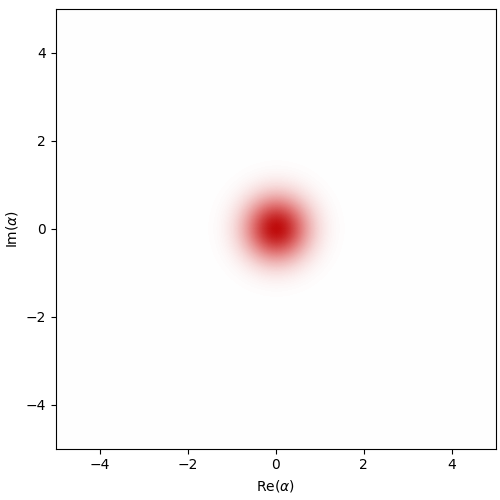

In [6]:
na = 15 # Hilbert space dimension
a = dq.destroy(na) # annihilaiton operator
psi0 = dq.fock(na, 0) # initial state
H = dq.zeros(na) # zero Hamiltonian
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, 3, 100)
loss_op = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(res.states)

You will explore how you can engineer such an effective Hamiltonian in practice using superconducting circuit QED and simulate it using `dynamiqs` in the challenge. 